In [1]:
from GraphFloris.WindFarm import WindFarm
from GraphFloris.visualize import visualize_wind_farm

Using backend: pytorch


In [2]:
farm = WindFarm(5, 3000, 3000, min_distance_factor=2.0, dist_cutoff_factor=200)

C:\Users\joon0\Anaconda3\envs\gpu_torch130\lib\site-packages\dgl\base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


C:\Users\joon0\dev\GraphFloris\GraphFloris\visualize.py:89: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(0.0, 1.0)


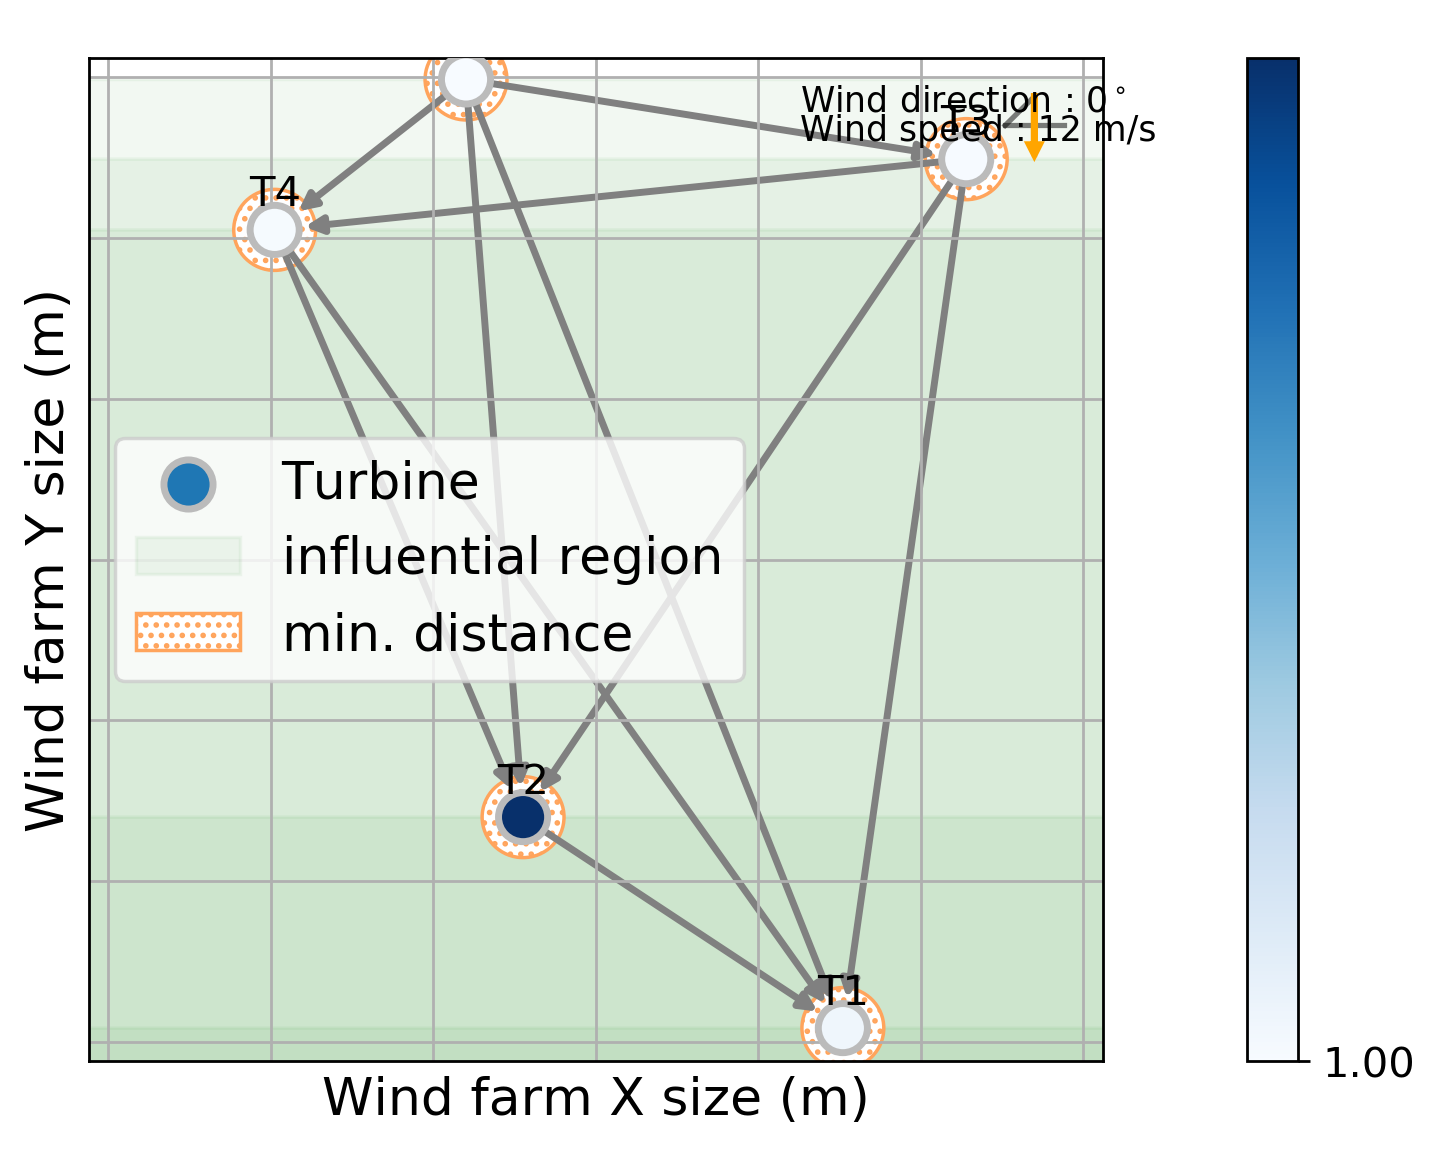

In [3]:
ws = 12
wd = 0
ag_th = 90
farm.update_graph(wind_speed=ws, wind_direction=wd, angle_threshold=ag_th)
farm.visualize_farm()